# Hourly PSDS - ROMY | FUR | TILT with FFBI

## Load Libraries

In [13]:
from obspy import UTCDateTime
from scipy.signal import welch
from numpy import log10, zeros, pi, append, linspace, mean, median, array, where, transpose, shape, histogram, arange, nanmedian, append
from numpy import logspace, linspace, log, log10, isinf, ones, nan, count_nonzero, sqrt, isnan, append
from pandas import DataFrame, concat, Series, date_range, read_csv, read_pickle
from tqdm import tqdm
from pathlib import Path

import os, sys
import pickle
import matplotlib.pyplot as plt

from andbro__store_as_pickle import __store_as_pickle

import warnings
warnings.filterwarnings('ignore')

In [14]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [71]:
## _____________________
## pressure data
# name, comp, app = "PROMY", "", ""
# name, comp, app = "FFBI", "BDF", ""
# name, comp, app = "FFBI", "BDO", ""

## _____________________
## ROMY data
# name, comp, app = "ROMY", "BJZ", ""
# name, comp, app = "ROMY", "BJU", ""
# name, comp, app = "ROMY", "BJV", ""
# name, comp, app = "ROMY", "BJN", ""
# name, comp, app = "ROMY", "BJE", ""

# name, comp, app = "ROMY", "BAE", ""


## _____________________
## FUR data
# name, comp, app = "FUR", "BHZ", ""
# name, comp, app = "FUR", "BHN", ""
# name, comp, app = "FUR", "BHE", ""

## _____________________
## TILT data
# name, comp, app = "DROMY", "LAN", ""
# name, comp, app = "DROMY", "LAE", ""
# name, comp, app = "DROMY", "LAT", ""


## _____________________
## coherence data
# name, comp, app = "ROMY", "BJZ", "_coherence"
# name, comp, app = "ROMY", "BJU", "_coherence"
# name, comp, app = "ROMY", "BJV", "_coherence"
# name, comp, app = "ROMY", "BJN", "_coherence"
# name, comp, app = "ROMY", "BJE", "_coherence"

# name, comp, app = "ROMY", "BAE", "_coherence"
# name, comp, app = "ROMY", "BAN", "_coherence"
name, comp, app = "ROMY", "BAZ", "_coherence"


# name, comp, app = "FUR", "BHZ", "_coherence"
# name, comp, app = "FUR", "BHN", "_coherence"
# name, comp, app = "FUR", "BHE", "_coherence"

# name, comp, app = "DROMY", "LAN", "_coherence"
# name, comp, app = "DROMY", "LAE", "_coherence"

name0 = "BDO"

In [72]:
config = {}

config['year'] = "2023"

config['path'] = data_path+f"LNM2/PSDS/"

config['startdate'], config['enddate'] = "2023-10-01", "2023-11-30"

## specify paths
config['outpath_figures'] = data_path+f"LNM2/figures/"

config['path_to_outdata'] = data_path+f"LNM2/data/"

if "coherence" in app:
    config['filename'] = f"{name}{app}/{config['year']}_FFBI_{name0}_{name}_{comp}_3600"
    config['outname'] = f"{name}_{comp}_coherence"
else:
    config['filename'] = f"{name}{app}/{config['year']}_{name}_{comp}_3600"
    config['outname'] = f"{name}_{comp}"

## Methods

In [73]:
def __load_data_file(path, file):

    from tqdm.notebook import tqdm
    from numpy import array

    psds_all = []

    datafile = read_pickle(path+file)

    try:
        psds = datafile['psd']
    except:
        psds = datafile['coherence']

    ff = datafile['frequencies']

    del datafile

    for psd in psds:
        psds_all.append(psd)

    return ff, psds_all

## Compute PSD value per frequency band

In [74]:
d1, d2 = config['startdate'], config['enddate']

psds_medians_out, times_out = [], []

dat, dates = [], []
# dat = ones((date_range(d1, d2).size*24, 36002))*nan
# dates = ones((date_range(d1, d2).size*24))*nan
index = 0
for jj, day in enumerate(date_range(d1, d2)):

#     if jj > 4:
#         continue

    day = str(day).split(" ")[0].replace("-", "")

    print(f"{config['filename']}_{day}_hourly.pkl")

    try:
        ff, _dat = __load_data_file(config['path'], f"{config['filename']}_{day}_hourly.pkl")
        # _dat, _rejected = __remove_noisy_psds(_dat, threshold_mean=1e-15, ff=ff1, flim=0.1)

    except Exception as e:
        # print(e)
        print(f" -> {day}: no data found")
        continue

    try:
        for _k, _psd in enumerate(_dat):
            dat.append(_psd)
            dates.append(f"{day}_{str(_k).rjust(2, '0')}")
            # dat[index] = _psd
            # dates[index] = f"{day}_{str(_k).rjust(2, '0')}"
            index += 1

    except Exception as e:
        print(e)
        print(f" -> skip {day}")
        continue

# dat = array(dat)

ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231001_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231002_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231003_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231004_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231005_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231006_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231007_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231008_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231009_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231010_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231011_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231012_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231013_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231014_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231015_hourly.pkl
ROMY_coherence/2023_FFBI_BDO_ROMY_BAZ_3600_20231016_hou

### Get frequency bands

In [75]:
from functions.get_octave_bands import __get_octave_bands

In [76]:
f_lower, f_upper, f_center = __get_octave_bands(1e-3, 1e0, faction_of_octave=12, plot=False)

### Get PSD average for frequency bands

In [77]:
def __get_band_average(freq, data, f_center, f_upper, f_lower):

    ## get frequency indices
    fl_idx, fu_idx = [], []

    for _k, (fl, fu) in enumerate(zip(f_lower, f_upper)):
        if _k <= len(f_center):

            for _i, _f in enumerate(freq):
                if _f >= fl:
                    fl_idx.append(int(_i))
                    break

            for _i, _f in enumerate(freq):
                if _f >= fu:
                    fu_idx.append(int(_i))
                    break

    ## compute average per band
    psd_avg, fc, fu, fl = [], [], [], []
    for _n, (ifl, ifu) in enumerate(zip(fl_idx, fu_idx)):

        avg = []
        for _psd in data:
            avg.append(nanmedian(_psd[ifl:ifu]))

        psd_avg.append(array(avg))
        fc.append(f_center[_n])
        fu.append(f_upper[_n])
        fl.append(f_lower[_n])

    psd_avg = array(psd_avg)


    ## check up plot
    plt.figure(figsize=(15, 5))

    for _j, dd in enumerate(psd_avg):
        plt.scatter(ones(len(dd))*fc[_j], dd, s=5)
        plt.xscale("log")
        if not "_coherence" in app:
            plt.yscale("log")
        else:
            plt.ylim(-0.1, 1.1)

    plt.show();


    ## output
    out = {}
    out['psd_avg'] = psd_avg
    out['fcenter'] = array(fc)
    out['fupper'] = array(fu)
    out['flower'] = array(fl)
    out['dates'] = dates

    return out

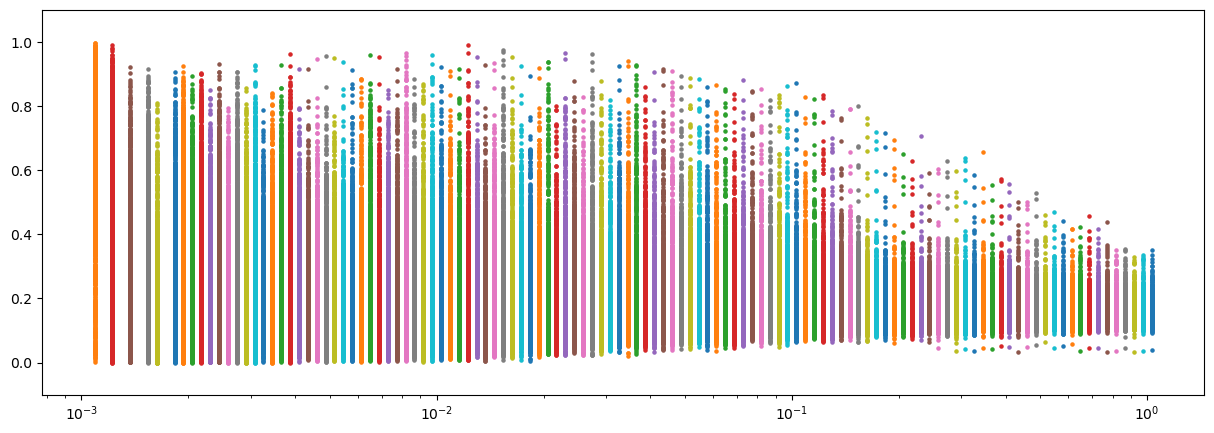

In [78]:
out0 = __get_band_average(ff, dat, f_center, f_upper, f_lower)

## Store data

In [79]:
## create and fill data frame
_df_out = DataFrame()

_df_out['dates'] = out0['dates']

for _i, fc in enumerate(out0['fcenter']):
    _df_out[round(fc, 5)] = out0['psd_avg'][_i]

df_out = _df_out.copy()

## store as pickle file
print(f" -> {config['outname']}.pkl")
df_out.to_pickle(config['path_to_outdata']+config['outname']+".pkl")

 -> ROMY_BAZ_coherence.pkl


In [80]:
os.system("""spd-say "Finished" """)

0

## Plot Density Histogram

In [ ]:
from functions.get_hist_loglog import __get_hist_loglog

In [ ]:
out = __get_hist_loglog(dat, ff, bins=100, density=False, axis=1, plot=True)

In [ ]:

# import matplotlib.pyplot as plt
# import pickle
# import os
# import sys

# from obspy import UTCDateTime, read, read_inventory
# from obspy.signal.rotate import rotate2zne
# from numpy import log10, zeros, append, linspace, mean, median, array, where, transpose, shape, histogram
# from pandas import DataFrame, concat, Series, date_range, to_pickle
# from pathlib import Path
# from scipy.signal import coherence, welch

# from andbro__read_sds import __read_sds
# from andbro__readYaml import __readYaml

# import warnings
# warnings.filterwarnings('ignore')


# if os.uname().nodename == 'lighthouse':
#     root_path = '/home/andbro/'
#     data_path = '/home/andbro/kilauea-data/'
#     archive_path = '/home/andbro/freenas/'
#     bay_path = '/home/andbro/bay200/'
# elif os.uname().nodename == 'kilauea':
#     root_path = '/home/brotzer/'
#     data_path = '/import/kilauea-data/'
#     archive_path = '/import/freenas-ffb-01-data/'
#     bay_path = '/bay200/'
# elif os.uname().nodename == 'lin-ffb-01':
#     root_path = '/home/brotzer/'
#     data_path = '/import/kilauea-data/'
#     archive_path = '/import/freenas-ffb-01-data/'
#     bay_path = '/bay200/'

# # In[] ___________________________________________________________
# ''' ---- set variables ---- '''

# config = {}


# config['year'] = 2023


# config['seed1'] = "BW.FFBI..BDO"  ## F = infrasound | O = absolute


# config['seed2'] = "GR.FUR..BHZ"

# config['date1'] = UTCDateTime(f"{config['year']}-09-23")
# config['date2'] = UTCDateTime(f"{config['year']}-09-23")

# config['path_to_data1'] = bay_path+f"mseed_online/archive/"
# config['path_to_inv1'] = root_path+"Documents/ROMY/ROMY_infrasound/station_BW_FFBI.xml"

# if "FUR" in config['seed2']:
#     config['path_to_data2'] = bay_path+f"mseed_online/archive/"
#     config['path_to_inv2'] = root_path+"Documents/ROMY/stationxml_ringlaser/dataless.seed.GR_FUR"
# elif "ROMY" in config['seed2']:
#     config['path_to_data2'] = archive_path+f"romy_archive/"
#     config['path_to_inv2'] = root_path+"Documents/ROMY/stationxml_ringlaser/dataless.seed.BW_ROMY"


# ## specify unit
# config['unit'] = "Pa" ## hPa or Pa or None

# config['interval_seconds'] = 3600 ## in seconds
# config['interval_overlap'] = 0  ## in seconds

# ## __________________________
# ## choose psd method
# config['mode'] = "multitaper"  ## "multitaper" | "welch"

# ## __________________________
# ## set welch and coherence settings

# config['taper'] = 'hann'
# config['tseconds'] = 3600 ## seconds
# config['toverlap'] = 0 ## 0.75
# config['nfft'] = None
# config['detrend'] = 'constant'
# config['scaling'] = 'density'
# config['onesided'] = True
# config['frequency_limits'] = None # (0, 0.05) # in Hz

# ## __________________________
# ## set multitaper settings

# ## number of taper for multitaper to use
# config['n_taper'] = 5


# config['sta1'] = config['seed1'].split(".")[1]
# config['sta2'] = config['seed2'].split(".")[1]

# config['cha1'] = config['seed1'].split(".")[3]
# config['cha2'] = config['seed2'].split(".")[3]

# config['outname1'] = f"{config['year']}_{config['sta1']}_{config['cha1']}_{config['interval_seconds']}"
# config['outname2'] = f"{config['year']}_{config['sta2']}_{config['cha2']}_{config['interval_seconds']}"
# config['outname3'] = f"{config['year']}_{config['sta1']}_{config['cha1']}_{config['sta2']}_{config['cha2']}_{config['interval_seconds']}"

# config['outpath1'] = data_path+f"LNM2/PSDS/{config['sta1']}/"
# config['outpath2'] = data_path+f"LNM2/PSDS/{config['sta2']}/"
# config['outpath3'] = data_path+f"LNM2/PSDS/{config['sta2']}_coherence/"

# ## tiltmeter configurations
# confTilt = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/", "tiltmeter.conf")


# # In[] ___________________________________________________________
# '''---- define methods ----'''

# def __multitaper_psd(arr, dt, n_win=5, time_bandwidth=4.0):

#     import multitaper as mt

#     out_psd = mt.MTSpec(arr, nw=time_bandwidth, kspec=n_win, dt=dt, iadapt=0)

#     _f, _psd = out_psd.rspec()

#     f = _f.reshape(_f.size)
#     psd = _psd.reshape(_psd.size)


#     return f, psd



# def __write_to_csv(data, text, config):

#     import csv

#     opath = config['outpath']
#     oname = config['outname']+"_"+text+"_psd.csv"

#     # open the file in the write mode
#     with open(opath+oname, 'w') as file:

#         writer = csv.writer(file)
#         for row in data:
#             writer.writerow(row)

#     if Path(opath+oname).exists():
#         print(f"created: {opath}{oname}")


# def __save_to_pickle(obj, path, name):

#     ofile = open(path+name+".pkl", 'wb')
#     pickle.dump(obj, ofile)

#     if Path(path+name+".pkl").exists():
#         print(f"\n -> created:  {path}{name}.pkl")


# def __get_time_intervals(tbeg, tend, interval_seconds, interval_overlap):

#     from obspy import UTCDateTime

#     tbeg, tend = UTCDateTime(tbeg), UTCDateTime(tend)

#     times = []
#     t1, t2 = tbeg, tbeg + interval_seconds
#     while t2 <= tend:
#         times.append((t1, t2))
#         t1 = t1 + interval_seconds - interval_overlap
#         t2 = t2 + interval_seconds - interval_overlap

#     return times


# def __conversion_to_tilt(st, conf):

#     st0 = st.copy()

#     def convertTemp(trace):
#         Tvolt = trace.data * conf.get('gainTemp')
#         coeff = conf.get('calcTempCoefficients')
#         return coeff[0] + coeff[1]*Tvolt + coeff[2]*Tvolt**2 + coeff[3]*Tvolt**3

#     def convertTilt(trace, conversion, sensitivity):
#         return trace.data * conversion * sensitivity

#     for tr in st0:
#         if tr.stats.channel[-1] == 'T':
#             tr.data = convertTemp(tr)
#         elif tr.stats.channel[-1] == 'N':
#             tr.data = convertTilt(tr, conf['convTN'], conf['gainTilt'])
#         elif tr.stats.channel[-1] == 'E':
#             tr.data = convertTilt(tr, conf['convTE'], conf['gainTilt'])
#         else:
#             print("no match")

#     print(f"  -> converted data of {st[0].stats.station}")
#     return st0


# # In[] ___________________________________________________________


# days = int((config['date2'] - config['date1'])/86400)+1

# if not Path(config['outpath1']).exists():
#     Path(config['outpath1']).mkdir()
#     print(f" -> created {config['outpath1']}")

# if not Path(config['outpath2']).exists():
#     Path(config['outpath2']).mkdir()
#     print(f" -> created {config['outpath2']}")


# minimum_collection = []
# minimal_collection = []
# columns = []
# medians, dd = [], []

# for date in date_range(str(config['date1'].date), str(config['date2'].date), days):

#     print(f"\nprocessing  {str(date)[:10]}...")


#     ## load data for the entire day
#     config['tbeg'] = UTCDateTime(date)
#     config['tend'] = UTCDateTime(date) + 86400

#     try:
#         st1 = __read_sds(config['path_to_data1'], config['seed1'], config['tbeg']-1800, config['tend']+1800)
#         st2 = __read_sds(config['path_to_data2'], config['seed2'], config['tbeg']-1800, config['tend']+1800)
#     except:
#         print(f" -> failed to load data ...")
#         continue



#     ## read inventories
#     try:
#         inv1 = read_inventory(config['path_to_inv1'])
#         inv2 = read_inventory(config['path_to_inv2'])
#     except:
#         print(f" -> failed to load inventory ...")
#         continue

#     if "BW.ROMY" in config['seed2'] and "Z" not in config['seed2']:
#         try:
#             _stU = __read_sds(config['path_to_data2'], "BW.ROMY..BJU", config['tbeg']-10, config['tend']+10)
#             _stV = __read_sds(config['path_to_data2'], "BW.ROMY..BJV", config['tbeg']-10, config['tend']+10)
#             _stZ = __read_sds(config['path_to_data2'], "BW.ROMY.10.BJZ", config['tbeg']-10, config['tend']+10)

#             print(_stU, _stV, _stZ)

#             ori_z = inv2.get_orientation("BW.ROMY.10.BJZ")
#             ori_u = inv2.get_orientation("BW.ROMY..BJU")
#             ori_v = inv2.get_orientation("BW.ROMY..BJV")

#             romy_z, romy_n, romy_e = rotate2zne(
#                                                _stZ[0].data, ori_z['azimuth'], ori_z['dip'],
#                                                _stU[0].data, ori_u['azimuth'], ori_u['dip'],
#                                                _stV[0].data, ori_v['azimuth'], ori_v['dip'],
#                                                inverse=False
#                                               )

#             if "N" in config['seed2']:
#                 _stU[0].data = romy_n
#                 st2 = _stU.copy()
#                 # st2.select(channel="*U")[0].stats.channel = "BJN"

#             elif "E" in config['seed2']:
#                 _stV[0].data = romy_e
#                 st2 = _stV.copy()
#                 # st2.select(channel="*V")[0].stats.channel = "BJE"

#         except Exception as e:
#             print(e)
#             print(f" -> failed to rotate ROMY ...")
#             continue


#     if len(st1) > 1:
#         st1.merge()
#     if len(st2) > 1:
#         st2.merge()

#     if len(st1) == 0 or len(st2) == 0:
#         print(st1)
#         print(st2)
#         continue

#     ## conversion
#     if "O" in st1[0].stats.channel:

#         if config['unit'] == "Pa":
#             for tr in st1:
#                 tr.data = tr.data *1.589e-6 *1e5   # gain=1 sensitivity_reftek=6.28099e5count/V; sensitivity_mb2005 = 1 mV/hPa
#         elif config['unit'] == "hPa":
#             for tr in st1:
#                 tr.data = tr.data *1.589e-6 *1e3   # gain=1 sensitivity_reftek=6.28099e5count/V; sensitivity_mb2005 = 1 mV/hPa



#     elif "F" in st1[0].stats.channel:
# #            for tr in st1:
# #                tr.data = tr.data *1.589e-6 /0.02  # gain=1 sensitivity_reftek=6.28099e5count/V; sensitivity_mb2005=0.02 V/Pa
#         st1 = st1.remove_response(inv1, water_level=10)

#     if "J" in st2[0].stats.channel:
#         st2 = st2.remove_sensitivity(inv2)

#     elif "H" in st2[0].stats.channel:
#         st2 = st2.remove_response(inv2, output="ACC", water_level=10)

#     elif "A" in st2[0].stats.channel:
#         st2 = __conversion_to_tilt(st2, confTilt["BROMY"])

#     ## Pre-Processing
#     try:
#         st1 = st1.split()
#         st2 = st2.split()


#         if "BW.DROMY" in config['seed2']:
#             st2 = st2.filter("lowpass", freq=0.25, corners=4, zerophase=True)
#             st2 = st2.decimate(2, no_filter=True) ## 1 -> 0.5 Hz

#             st1 = st1.filter("lowpass", freq=0.25, corners=4, zerophase=True)
#             st1 = st1.decimate(2, no_filter=True) ## 40 -> 20 Hz
#             st1 = st1.decimate(2, no_filter=True) ## 20 -> 10 Hz
#             st1 = st1.decimate(2, no_filter=True) ## 10 -> 5 Hz
#             st1 = st1.decimate(5, no_filter=True) ## 5 -> 1 Hz
#             st1 = st1.decimate(2, no_filter=True) ## 1 -> 0.5 Hz

#             ## convert tilt to acceleration
#             for tr in st2:
#                 tr.data = tr.data*9.81

#         else:

#             # st1.detrend("demean")
#             # st2.detrend("demean")
#             # st1.taper(0.01)
#             # st2.taper(0.01)

#             st1 = st1.filter("lowpass", freq=5, corners=4, zerophase=True)
#             st2 = st2.filter("lowpass", freq=5, corners=4, zerophase=True)

#             st1 = st1.decimate(2, no_filter=True) ## 40 -> 20 Hz
#             st1 = st1.decimate(2, no_filter=True) ## 40 -> 20 Hz
#             st2 = st2.decimate(2, no_filter=True) ## 40 -> 20 Hz
#             # st1 = st1.resample(20.0, no_filter=False)
#             # st2 = st2.resample(20.0, no_filter=False)


#         st1 = st1.merge()
#         st2 = st2.merge()

#         st1 = st1.trim(config['tbeg'], config['tend'])
#         st2 = st2.trim(config['tbeg'], config['tend'])

#     except Exception as e:
#         print(e)
#         print(f" -> pre-processing failed!")
#         continue

#     # st1.plot(equal_scale=False);
#     # st2.plot(equal_scale=False);

#     ## prepare time intervals
#     times = __get_time_intervals(config['tbeg'], config['tend'], config['interval_seconds'], config['interval_overlap'])

#     ## prepare psd parameters
#     config['nperseg'] = int(st1[0].stats.sampling_rate*config.get('tseconds'))
#     config['noverlap'] = int(0.5*config.get('nperseg'))


#     print(st1)
#     print(st2)


#     if len(st1[0].data) != len(st2[0].data):
#         print(" -> not sampe amount of samples!")
#         continue


#     ## run operations for time intervals
#     for n, (t1, t2) in enumerate(times):

#         ## trim streams for current interval
#         _st1 = st1.copy().trim(t1, t2, nearest_sample=False)
#         _st2 = st2.copy().trim(t1, t2, nearest_sample=False)

# #            print("st: ", _st1[0].data.size, _st2[0].data.size)

#         if n == 0:
#             ## prepare lists
#             if config['mode'] == "welch":
#                 psds1 = zeros([len(times), int(config.get('nperseg')/2)+1])
#                 psds2 = zeros([len(times), int(config.get('nperseg')/2)+1])
#                 cohs = zeros([len(times), int(config.get('nperseg')/2)+1])
#             elif config['mode'] == "multitaper":
#                 # psds1 = zeros([len(times), int((config['interval_seconds']*20))])
#                 # psds2 = zeros([len(times), int((config['interval_seconds']*20))])
#                 # cohs = zeros([len(times), int(config.get('nperseg')/2)])
#                 psds1 = zeros([len(times), int(_st1[0].stats.npts)+1])
#                 psds2 = zeros([len(times), int(_st2[0].stats.npts)+1])
#                 cohs = zeros([len(times), int(config.get('nperseg')/2)+1])


#         ## compute power spectra
#         if config['mode'] == "welch":

#             f1, psd1 = welch(
#                             _st1[0].data,
#                             fs=_st1[0].stats.sampling_rate,
#                             window=config.get('taper'),
#                             nperseg=config.get('nperseg'),
#                             noverlap=config.get('noverlap'),
#                             nfft=config.get('nfft'),
#                             detrend=config.get('detrend'),
#                             return_onesided=config.get('onesided'),
#                             scaling=config.get('scaling'),
#                            )

#             f2, psd2 = welch(
#                             _st2[0].data,
#                             fs=_st2[0].stats.sampling_rate,
#                             window=config.get('taper'),
#                             nperseg=config.get('nperseg'),
#                             noverlap=config.get('noverlap'),
#                             nfft=config.get('nfft'),
#                             detrend=config.get('detrend'),
#                             return_onesided=config.get('onesided'),
#                             scaling=config.get('scaling'),
#                            )

In [ ]:


# from multitaper import MTCross, MTSpec

# f1, psd1 = __multitaper_psd(_st1[0].data, _st1[0].stats.delta, n_win=config.get("n_taper"), time_bandwidth=3)

# f2, psd2 = __multitaper_psd(_st2[0].data, _st2[0].stats.delta, n_win=config.get("n_taper"), time_bandwidth=3)

# psds1[n] = psd1
# psds2[n] = psd2

# # _st1.detrend("demean")
# # _st1.filter("bandpass", freqmin=0.001, freqmax=5.0, corners=4, zerophase=True)
# # _st1.plot();

# # _st2.detrend("demean")
# # _st2.filter("bandpass", freqmin=0.001, freqmax=5.0, corners=4, zerophase=True)
# # _st2.plot();

# x = _st1[0].data
# y = _st2[0].data
# dt = _st1[0].stats.delta

# P1 = MTSpec(x, 4, 5, dt)
# P2 = MTSpec(y, 4, 5, dt)

# Pxy  = MTCross(P1, P2, wl=0.001)

# from numpy.fft import fft

# N = Pxy.freq.size

# fxy_new, pxy_new = Pxy.freq[:,0][:N//2+1], Pxy.cohe[:,0][:N//2+1]

# # plt.semilogx(dcohe[len(dcohe)//2:])
# plt.semilogx(fxy_new, pxy_new)
# # plt.semilogx(Pxy.freq[:,0], Pxy.cohe[:,0])

# psd1.size, fxy_new.size, pxy_new.size, fxy_new[0]

In [ ]:
# from scipy.signal import resample_poly

# pxy_new = resample_poly(Pxy.cohe, 2, 4)

# fxy_new = resample_poly(Pxy.freq, 2, 4)

# plt.semilogx(Pxy.freq, Pxy.cohe)
# plt.semilogx(fxy_new, pxy_new)

In [ ]:
# from gwpy.timeseries import TimeSeriesDict
# from pandas import DataFrame
# from gwpy.timeseries import TimeSeries

# dat1 = TimeSeries(_st1[0].data, t0=0, dt=0.1, channel="d1")
# dat2 = TimeSeries(_st2[0].data, t0=0, dt=0.1, channel="d2")

# # coh = dat1.coherence_spectrogram(dat2, 10, fftlength=1/1000, overlap=.25)

In [ ]:
# plot = coh.plot()
# ax = plot.gca()
# ax.set_ylabel('Frequency [Hz]')
# ax.set_yscale('log')
# ax.set_ylim(10, 8000)
# ax.set_title(
#     'Coherence between PSL periscope motion and LIGO-Hanford strain data',
# )
# ax.grid(True, 'both', 'both')
# ax.colorbar(label='Coherence', clim=[0, 1], cmap='plasma')
# plot.show()